In [4]:
!pip install ipython
!pip3 install ipython


list_persions
jiangsir 94686663-6c95-411c-bb36-bba07160e85c
face3.jpg偵測到 3 個人


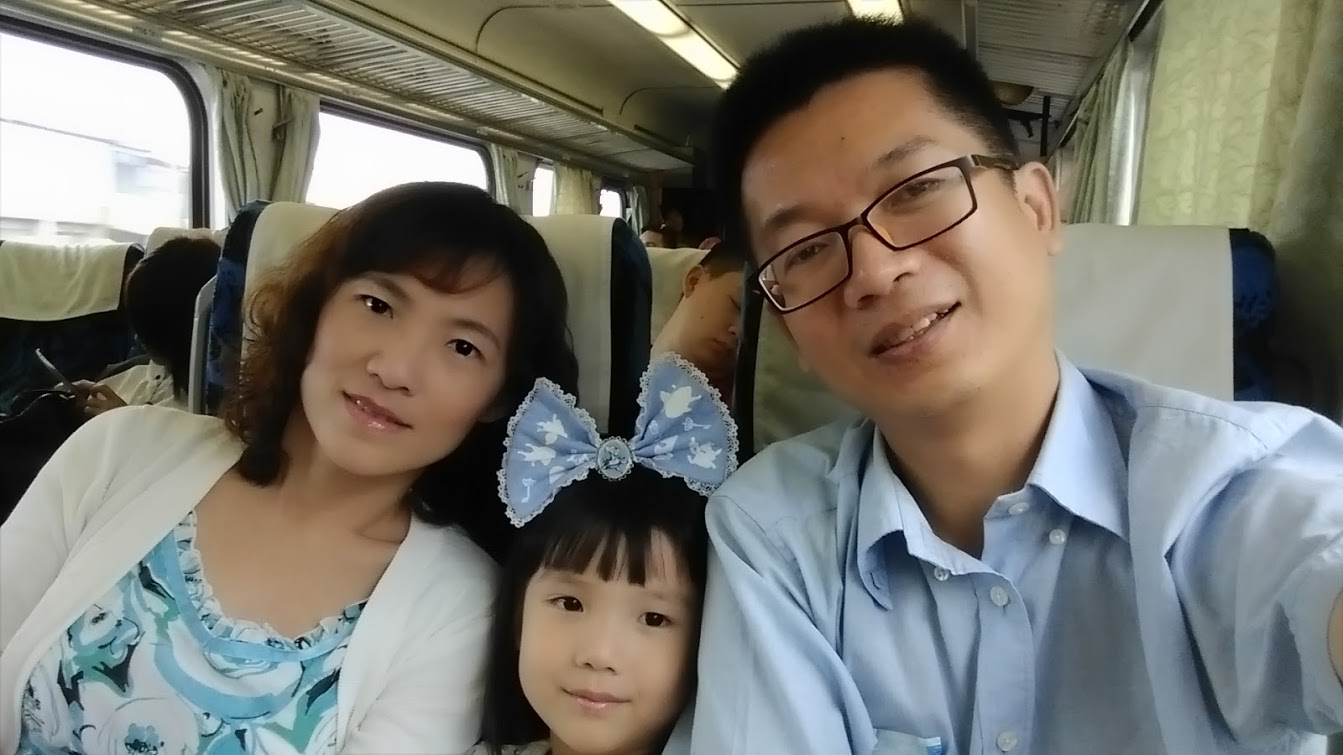

faceRectangle =  {'top': 137, 'height': 268, 'width': 268, 'left': 751}
faceId =  d296d13c-0f48-44c9-a21f-f2e3ff580b2f


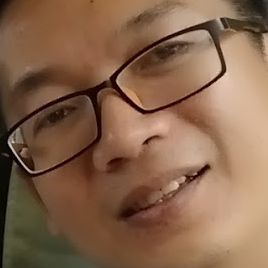

faceRectangle =  {'top': 264, 'height': 206, 'width': 206, 'left': 295}
faceId =  df1749a1-c55d-4402-a3d2-ad3e6e17fd61


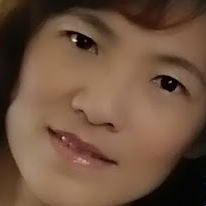

faceRectangle =  {'top': 561, 'height': 182, 'width': 182, 'left': 513}
faceId =  ced65751-bf25-466e-8d7a-782969e2253c


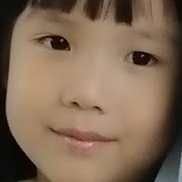

face4.jpg偵測到 2 個人


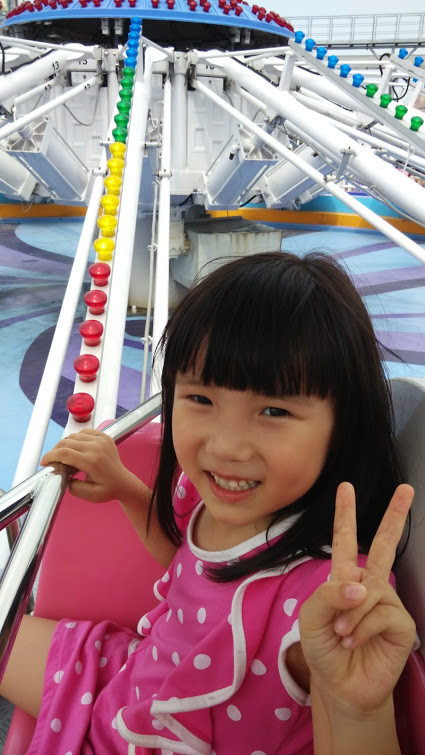

faceRectangle =  {'top': 363, 'height': 157, 'width': 157, 'left': 156}
faceId =  7a4ce6a3-75d7-4d4e-ace0-51b0e8c7474b


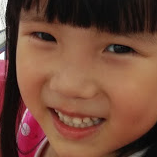

faceRectangle =  {'top': 331, 'height': 49, 'width': 49, 'left': 60}
faceId =  351982d5-d489-4ee2-a6cf-6d08c387d675


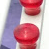

face5.jpg偵測到 0 個人


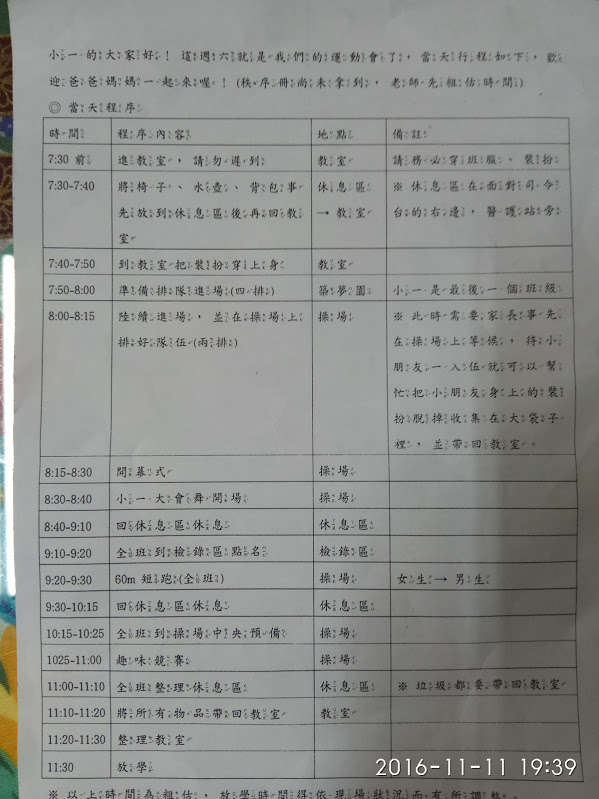

faceids= ['7a4ce6a3-75d7-4d4e-ace0-51b0e8c7474b', 'ced65751-bf25-466e-8d7a-782969e2253c', 'df1749a1-c55d-4402-a3d2-ad3e6e17fd61', 'd296d13c-0f48-44c9-a21f-f2e3ff580b2f', '351982d5-d489-4ee2-a6cf-6d08c387d675']
開始辨識。
facejsons= [{'faceId': '7a4ce6a3-75d7-4d4e-ace0-51b0e8c7474b', 'candidates': []}, {'faceId': 'ced65751-bf25-466e-8d7a-782969e2253c', 'candidates': []}, {'faceId': 'df1749a1-c55d-4402-a3d2-ad3e6e17fd61', 'candidates': []}, {'faceId': 'd296d13c-0f48-44c9-a21f-f2e3ff580b2f', 'candidates': [{'confidence': 0.84301, 'personId': '94686663-6c95-411c-bb36-bba07160e85c'}]}, {'faceId': '351982d5-d489-4ee2-a6cf-6d08c387d675', 'candidates': []}]


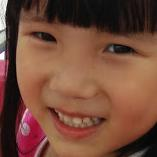

facejson =  {'faceId': '7a4ce6a3-75d7-4d4e-ace0-51b0e8c7474b', 'candidates': []}
沒有發現符合的人！


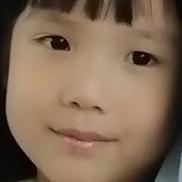

facejson =  {'faceId': 'ced65751-bf25-466e-8d7a-782969e2253c', 'candidates': []}
沒有發現符合的人！


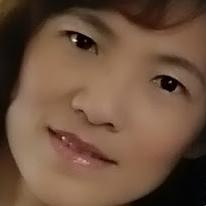

facejson =  {'faceId': 'df1749a1-c55d-4402-a3d2-ad3e6e17fd61', 'candidates': []}
沒有發現符合的人！


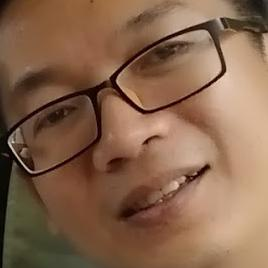

facejson =  {'faceId': 'd296d13c-0f48-44c9-a21f-f2e3ff580b2f', 'candidates': [{'confidence': 0.84301, 'personId': '94686663-6c95-411c-bb36-bba07160e85c'}]}
personId: 94686663-6c95-411c-bb36-bba07160e85c, 信心指數：0.84301
影中人：jiangsir


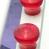

facejson =  {'faceId': '351982d5-d489-4ee2-a6cf-6d08c387d675', 'candidates': []}
沒有發現符合的人！


In [70]:
import http.client, urllib.request, urllib.parse, urllib.error, base64, json
from IPython.display import Image
from IPython.display import display
from PIL import Image as pilImage

api_key = 'ab4a7f41157e4592aa7cf47de4be49a1'
host = 'westcentralus.api.cognitive.microsoft.com'
personGroupId = 'jiangsir_groupid4'

def identify(faceids, personGroupId):
    print("開始辨識。")
    headers = {
        # Request headers
        'Content-Type': 'application/json',
        'Ocp-Apim-Subscription-Key': api_key,
    }

    params = urllib.parse.urlencode({
    })

    requestbody = '''{
        "personGroupId": "'''+personGroupId+'''",
        "faceIds":'''+str(faceids)+''',
        "maxNumOfCandidatesReturned":1,
        "confidenceThreshold": 0.5
    }'''

    try:
        conn = http.client.HTTPSConnection(host)
        conn.request("POST", "/face/v1.0/identify?%s" % params, requestbody, headers)
        response = conn.getresponse()
        data = response.read()
        #print(data)
        facejson = json.loads(str(data,'UTF-8'))
        #print(facejson)
        conn.close()
        return facejson
    except Exception as e:
        print("[Errno {0}] {1}".format(e.errno, e.strerror))

        
def get_a_person(personGroupId, personId):
    headers = {
        # Request headers
        'Ocp-Apim-Subscription-Key': api_key,
    }

    params = urllib.parse.urlencode({
    })

    try:
        conn = http.client.HTTPSConnection(host)
        conn.request("GET", "/face/v1.0/persongroups/"+personGroupId+"/persons/"+personId+"?%s" % params, "{body}", headers)
        response = conn.getresponse()
        data = response.read()
        personjson = json.loads(str(data,'UTF-8'))
        conn.close()
        return personjson
    except Exception as e:
        print("[Errno {0}] {1}".format(e.errno, e.strerror))
        

def list_persons_in_group(personGroupId):
    headers = {
        # Request headers
        'Ocp-Apim-Subscription-Key': api_key,
    }

    params = urllib.parse.urlencode({
        # Request parameters
        #'start': '{string}',
        #'top': '1000',
    })

    try:
        conn = http.client.HTTPSConnection(host)
        conn.request("GET", "/face/v1.0/persongroups/"+personGroupId+"/persons?%s" % params, "{body}", headers)
        response = conn.getresponse()
        data = response.read()
        #print(data)
        persons = json.loads(str(data,'UTF-8'))
        conn.close()
        return persons
    except Exception as e:
        print("[Errno {0}] {1}".format(e.errno, e.strerror))    

def DetectingLocal(imagepath):
    headers = {
        # Request headers
        #'Content-Type': 'application/json',
        'Content-Type': 'application/octet-stream', # 用本地圖檔辨識
        'Ocp-Apim-Subscription-Key': api_key,
    }

    params = urllib.parse.urlencode({
        # Request parameters
        'returnFaceId': 'true',
        'returnFaceLandmarks': 'false',
        'returnFaceAttributes': 'age,gender,headPose,smile,facialHair,glasses,emotion,hair,makeup,occlusion,accessories,blur,exposure',
    })

    #requestbody = '{"url":"'+imageurl+'"}'
    #requestbody = open('face1.JPG', "rb").read()
    requestbody = open(imagepath, "rb").read()
    
    try:
        conn = http.client.HTTPSConnection(host)
        conn.request("POST", "/face/v1.0/detect?%s" % params, requestbody, headers)
        response = conn.getresponse()
        data = response.read()
        #print(data)
        faces = json.loads(str(data,'UTF-8'))
        #print(parsed[0]['faceId'])
        #faceids.append(parsed[0]['faceId'])
        conn.close()
        
        print(imagepath + "偵測到 {0} 個人".format(len(faces)))
        display(Image(filename=imagepath))
        for face in faces:
            #print("face = ", face)
            print("faceRectangle = ", face['faceRectangle'])
            print("faceId = ", face['faceId'])
            left = face['faceRectangle']['left']
            top = face['faceRectangle']['top']
            height = face['faceRectangle']['height']
            width = face['faceRectangle']['width']
            
            img = pilImage.open(imagepath)
            #faceRectangle =  {'top': 141, 'height': 261, 'width': 261, 'left': 664}
            img2 = img.crop((left, top, left+width, top+height))
            img2.save(face['faceId']+".jpg")
            display(img2)
            #img = Image.open(imagepath)
            #area = (left, top, left+width, top+height)
            #cropped_img = img.crop(area)
            #cropped_img.show()
        return faces
    except Exception as e:
        print("[Errno {0}] {1}".format(e.errno, e.strerror))


##################################################################################################
### main
##################################################################################################
persons = list_persons_in_group(personGroupId)  
print("list_persions")
for person in persons:
    print(person["name"], person["personId"])


faceids = {}
imagepaths = []
#imagepaths.append("face1.JPG")
#imagepaths.append("face2.jpg")
imagepaths.append("face3.jpg")
imagepaths.append("face4.jpg")
imagepaths.append("face5.jpg")

#for imageurl in imageurls:
#    faceids.append(Detecting(imageurl))
for imagepath in imagepaths:
    for face in DetectingLocal(imagepath):
        faceids[face['faceId']]=imagepath

print("faceids=", list(faceids.keys()))

facejsons = identify(list(faceids.keys()), personGroupId)
print("facejsons=", facejsons)

for facejson in facejsons:
    display(Image(filename=facejson['faceId']+".jpg"))
    print("facejson = ", facejson)
    if len(facejson['candidates'])>0:
        print("personId: "+facejson["candidates"][0]["personId"]+", 信心指數："+str(facejson["candidates"][0]["confidence"]))
        personjson = get_a_person(personGroupId, facejson["candidates"][0]["personId"])
        print("影中人："+personjson['name'])
    else:
        print("沒有發現符合的人！")
    
    

#for i in range(len(faceids)):
#    if len(facejson[i]["candidates"])>0:
#        print("personId: "+facejson[i]["candidates"][0]["personId"]+", 信心指數："+str(facejson[i]["candidates"][0]["confidence"]))
#        personjson = get_a_person(personGroupId, facejson[i]["candidates"][0]["personId"])
#        print("影中人："+personjson['name'])
#    else:
#        print("沒有符合的人！")
    #display(Image(url=imagepaths[i]))
